<a href="https://colab.research.google.com/github/DacioSB/DataScience/blob/master/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training for chapter one of the statistics book

In [0]:
import pandas as pd

tabela = pd.read_csv("tabela.csv", sep = ";")
tabela.head()

,N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,idade_meses,reg_procedencia
0,1,solteiro,ensino fundamental,NaN,4.00,26,3,interior
1,2,casado,ensino fundamental,1.0,4.56,32,10,capital
2,3,casado,ensino fundamental,2.0,5.25,36,5,capital
3,4,solteiro,ensino médio,NaN,5.73,20,10,outra
4,5,solteiro,ensino fundamental,NaN,6.26,40,7,outra


In [0]:
tabela['n_filhos'].unique()

array([nan,  1.,  2.,  0.,  3.,  5.])

In [0]:
tabela['n_filhos'].value_counts()

2.0    7
1.0    5
0.0    4
3.0    3
5.0    1
Name: n_filhos, dtype: int64

In [0]:
tabela['n_filhos'].mean()

1.65

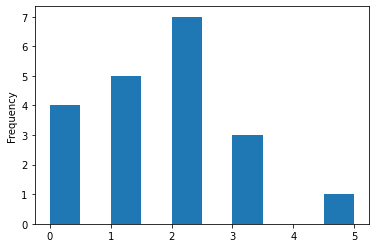

In [0]:
tabela.n_filhos.plot(kind = "hist")

In [0]:
tabela.n_filhos.describe()

count    20.000000
mean      1.650000
std       1.268028
min       0.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: n_filhos, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


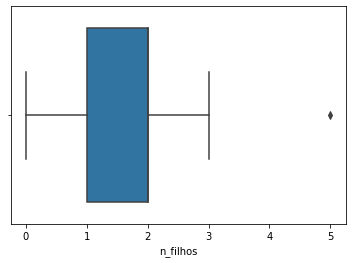

In [0]:
import seaborn as sns
sns.boxplot(tabela.n_filhos)

In [0]:
#Vou fazer uma query
#Quero saber o salario medio de quem tem ensino fundamental
tabela.query("grau_instrucao == 'ensino fundamental'").salario.mean()


7.836666666666666

In [0]:
tabela.query("grau_instrucao == 'ensino médio'").salario.mean()

11.528333333333334

In [0]:
tabela.query("grau_instrucao == 'superior'").salario.mean()

16.474999999999998

In [0]:
#media de salario por grau de instrucao... Agrupa por grau de instrucao e tira a media desse agrupamento
media_salarios = tabela.groupby("grau_instrucao").mean()["salario"]
media_salarios

grau_instrucao
ensino fundamental     7.836667
ensino médio          11.528333
superior              16.475000
Name: salario, dtype: float64

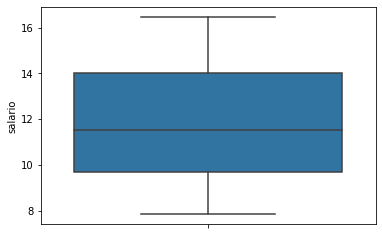

In [0]:
import matplotlib.pyplot as plt

sns.boxplot(y = media_salarios)
#boxplot como funciona? Linha de cima e linha de baixo sao o maior e menor valor que tenho em meus dados
#A linha no meio da caixa representa a mediana
#A linha de cima da caixa é a mediana dos valores maiores e iguais a mediana do centro ((16.48 + 11.53)/2)
#A linha de baixo da caixa é a medianada dos valores menores e iguais a mediana do centro ((7.84 + 11.53)/2)
#1o quartil, 2o quartil, 3o quartil, 4o quartil

In [0]:
#Quero fazer analise de frequencia apenas para a coluna n_filhos
conta_filhos = tabela.n_filhos.value_counts().to_frame().reset_index()
conta_filhos.columns = ["num_filhos", "frequency"]
conta_filhos

,num_filhos,frequency
0,2.0,7
1,1.0,5
2,0.0,4
3,3.0,3
4,5.0,1


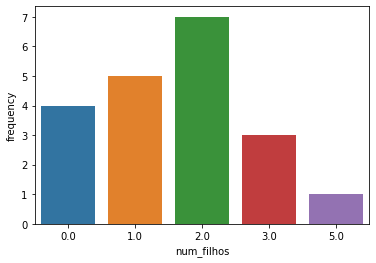

In [0]:
sns.barplot(x = "num_filhos", y = "frequency", data=conta_filhos)

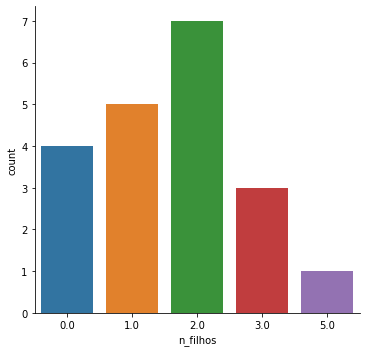

In [0]:
#Meio complicado esse barplot ne verdade?
#Existe o catplot pra facilitar nossa vida
#So preciso passar a categoria que quero contar, no caso, n_filhos

sns.catplot(x = "n_filhos", kind = "count", data=tabela)

([<matplotlib.patches.Wedge at 0x7f8b30141390>,
 [Text(0.4993895680663529, 0.9801071672559597, '2.0'),
  Text(-1.086457168210212, 0.17207795223283895, '1.0'),
  Text(-0.33991872319707345, -1.046162158377023, '0.0'),
  Text(0.7778174593052022, -0.7778174593052025, '3.0'),
  Text(1.086457178279648, -0.17207788865692558, '5.0')])

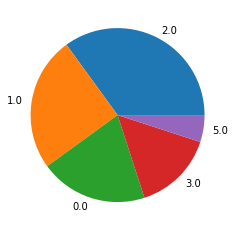

In [0]:
plt.pie(conta_filhos["frequency"], labels = conta_filhos["num_filhos"])
#Lembrando que eu estou trabalhando em cima daquele frame: conta_filhos = tabela.n_filhos.value_counts().to_frame().reset_index()

In [0]:
#Agora quero categorizar nao em 5 grupos... Mas apenas em 2... Quem tem 0.0 filhos e quem nao tem 0.0 filhos
#1 pego e agrupo as contagens gerais
total_por_n_filhos = tabela['n_filhos'].value_counts()
#2 pego so quem tem 0 filhos ***loc[] => localiza
total_0_filhos = total_por_n_filhos.loc[0.0]
#3 total geral (que vai dar 20)
total_geral = total_por_n_filhos.sum()

total_resto = total_geral-total_0_filhos

In [0]:
#Faz um dicionario passando os dois rotulos n_filhos e total
dados = {
    'n_filhos': ['sem filhos', 'com filhos'],
    'total' : [total_0_filhos, total_resto]
}

pd.DataFrame(dados)

,n_filhos,total
0,sem filhos,4
1,com filhos,16


([<matplotlib.patches.Wedge at 0x7f8b3009a6a0>,
 [Text(0.8899186877588753, 0.6465637858537406, 'sem filhos'),
  Text(-0.8899186574910393, -0.6465638275138399, 'com filhos')])

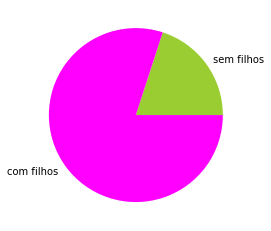

In [0]:
#Dai a gente pode fazer um barplot ou um pie plot

#sns.barplot(x = 'n_filhos', y = 'total', data = dados)
colors = ['yellowgreen', 'magenta']
plt.pie(dados['total'], labels= dados['n_filhos'], colors = colors)

In [0]:
#Quero o standard deviation do salario das pessoas que possuem ensino medio e ensino fundamental
#Pelo grafico vemos a diferença entre salarios
salarios_ef = tabela.query("grau_instrucao == 'ensino fundamental'")
salarios_em = tabela.query("grau_instrucao == 'ensino médio'")
print (len(salarios_ef), len(salarios_em))

12 18


In [0]:
salarios_ef.salario.mean()

7.836666666666666

In [0]:
salarios_em.salario.mean()

11.528333333333334

{'boxes': [<matplotlib.lines.Line2D at 0x7f8b30058eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b300688d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b30072390>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b30068fd0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8b300681d0>,
  <matplotlib.lines.Line2D at 0x7f8b30072e10>]}

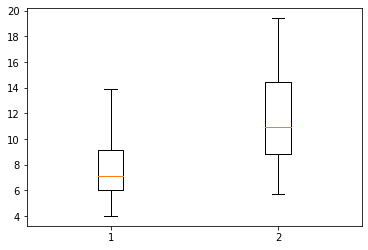

In [0]:
plt.boxplot([salarios_ef.salario, salarios_em.salario])

In [0]:
salarios_ef.salario.std()

2.956463899302474

In [0]:
salarios_em.salario.std()

3.7151442850612852

In [0]:
#salario da galera do ensino fundamental tem uma standard deviation menor

Treino de NUMPY agora

In [0]:
import numpy as np
from numpy import genfromtxt

table = genfromtxt('tabela.csv', delimiter = ';')

In [0]:
table

array([[  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [ 1.  ,   nan,   nan,   nan,  4.  , 26.  ,  3.  ,   nan],
       [ 2.  ,   nan,   nan,  1.  ,  4.56, 32.  , 10.  ,   nan],
       [ 3.  ,   nan,   nan,  2.  ,  5.25, 36.  ,  5.  ,   nan],
       [ 4.  ,   nan,   nan,   nan,  5.73, 20.  , 10.  ,   nan],
       [ 5.  ,   nan,   nan,   nan,  6.26, 40.  ,  7.  ,   nan],
       [ 6.  ,   nan,   nan,  0.  ,  6.66, 28.  ,  0.  ,   nan],
       [ 7.  ,   nan,   nan,   nan,  6.86, 41.  ,  0.  ,   nan],
       [ 8.  ,   nan,   nan,   nan,  7.39, 43.  ,  4.  ,   nan],
       [ 9.  ,   nan,   nan,  1.  ,  7.59, 34.  , 10.  ,   nan],
       [10.  ,   nan,   nan,   nan,  7.44, 23.  ,  6.  ,   nan],
       [11.  ,   nan,   nan,  2.  ,  8.12, 33.  ,  6.  ,   nan],
       [12.  ,   nan,   nan,   nan,  8.46, 27.  , 11.  ,   nan],
       [13.  ,   nan,   nan,   nan,  8.74, 37.  ,  5.  ,   nan],
       [14.  ,   nan,   nan,  3.  ,  8.95, 44.  ,  2.  ,   nan],
       [15.  ,   nan,   n

In [0]:
table.shape

(37, 8)

In [0]:
%time for i in range(1000000): table

CPU times: user 64.7 ms, sys: 1.7 ms, total: 66.4 ms
Wall time: 72.2 ms


In [0]:
py_list = list(range(37))
%time for i in range(1000000): py_list

CPU times: user 54 ms, sys: 636 µs, total: 54.6 ms
Wall time: 55.2 ms


In [0]:
#dimensoes do array numpy
table.ndim

2

In [0]:
#qtd de elementos na tabela
table.size

296

In [0]:
table.T

array([[  nan,  1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,
         9.  , 10.  , 11.  , 12.  , 13.  , 14.  , 15.  , 16.  , 17.  ,
        18.  , 19.  , 20.  , 21.  , 22.  , 23.  , 24.  , 25.  , 26.  ,
        27.  , 28.  , 29.  , 30.  , 31.  , 32.  , 33.  , 34.  , 35.  ,
        36.  ],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan],
       [  nan,   nan,  1.  ,  2.  ,   nan,   nan,  0.  ,   nan,   nan,
         1.  ,   nan,  2.  , 

In [0]:
table.tolist()

[[nan, nan, nan, nan, nan, nan, nan, nan],
 [1.0, nan, nan, nan, 4.0, 26.0, 3.0, nan],
 [2.0, nan, nan, 1.0, 4.56, 32.0, 10.0, nan],
 [3.0, nan, nan, 2.0, 5.25, 36.0, 5.0, nan],
 [4.0, nan, nan, nan, 5.73, 20.0, 10.0, nan],
 [5.0, nan, nan, nan, 6.26, 40.0, 7.0, nan],
 [6.0, nan, nan, 0.0, 6.66, 28.0, 0.0, nan],
 [7.0, nan, nan, nan, 6.86, 41.0, 0.0, nan],
 [8.0, nan, nan, nan, 7.39, 43.0, 4.0, nan],
 [9.0, nan, nan, 1.0, 7.59, 34.0, 10.0, nan],
 [10.0, nan, nan, nan, 7.44, 23.0, 6.0, nan],
 [11.0, nan, nan, 2.0, 8.12, 33.0, 6.0, nan],
 [12.0, nan, nan, nan, 8.46, 27.0, 11.0, nan],
 [13.0, nan, nan, nan, 8.74, 37.0, 5.0, nan],
 [14.0, nan, nan, 3.0, 8.95, 44.0, 2.0, nan],
 [15.0, nan, nan, 0.0, 9.13, 30.0, 5.0, nan],
 [16.0, nan, nan, nan, 9.35, 38.0, 8.0, nan],
 [17.0, nan, nan, 1.0, 9.77, 31.0, 7.0, nan],
 [18.0, nan, nan, 2.0, 9.8, 39.0, 7.0, nan],
 [19.0, nan, nan, nan, 10.53, 25.0, 8.0, nan],
 [20.0, nan, nan, nan, 10.76, 37.0, 4.0, nan],
 [21.0, nan, nan, 1.0, 11.06, 30.0, 9.0, n

In [0]:
#dataset = np.column_stack((anos, km, valor))
#sao tres files diferentes mas da pra fazer um unnico narray com eles

In [0]:
np.mean(table, axis = 0)

array([nan, nan, nan, nan, nan, nan, nan, nan])

In [0]:
#To pegando a media da seguinte coluna:
#a partir do primeiro subarray (ou seja nao pego o array so com nan)
#e pego o resto de 1 pra frente(slice)
#E dentro desses subarrays eu quero apenas os valores na posicao 6
media_array_6 = np.mean(table[1:, 6])
media_array_6

5.611111111111111

In [0]:
std_dev_6 = np.std(table[1:, 6])
std_dev_6

3.24275069944722

In [0]:
media_array_5 = np.mean(table[1:, 5])
media_array_5

34.583333333333336

In [0]:
std_dev_5 = np.std(table[1:, 5])
std_dev_5

6.643187822457261

In [0]:
tabela.dtypes

N                    int64
estado_civil        object
grau_instrucao      object
n_filhos           float64
salario            float64
idade_anos           int64
idade_meses          int64
reg_procedencia     object
dtype: object

# AAPL

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [12]:
from google.colab import files
uploaded = files.upload()


Saving aapl3.csv to aapl3.csv


In [13]:
#Store the data
AAPL = pd.read_csv("aapl3.csv")
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-27,112.419998,112.480003,109.029999,109.139999,99.772209,95568700
1,2015-01-28,117.629997,118.120003,115.309998,115.309998,105.412628,146477100
2,2015-01-29,116.320000,119.190002,115.559998,118.900002,108.694481,84436400
3,2015-01-30,118.400002,120.000000,116.849998,117.160004,107.103836,83745500
4,2015-02-02,118.050003,119.169998,116.080002,118.629997,108.447662,62739100
...,...,...,...,...,...,...,...
1337,2020-05-19,315.029999,318.519989,313.010010,313.140015,313.140015,25432400
1338,2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200
1339,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.850006,25672200
1340,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20450800


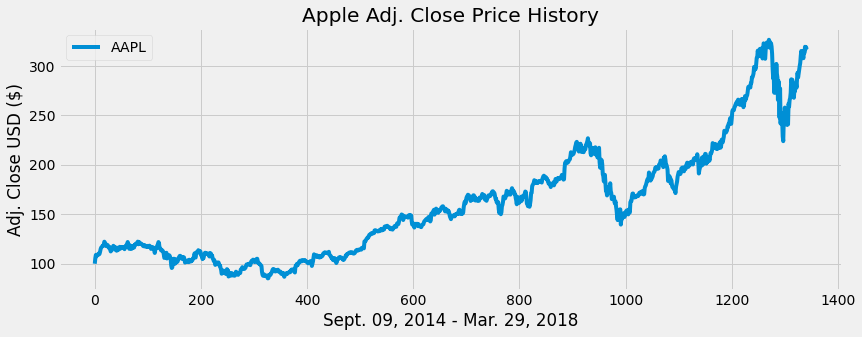

In [16]:
#Visualize
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL["Adj Close"], label = "AAPL")
plt.title("Apple Adj. Close Price History")
plt.xlabel("Sept. 09, 2014 - Mar. 29, 2018")
plt.ylabel("Adj. Close USD ($)")
plt.legend(loc="upper left")
plt.show()

In [21]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30["Adj Close"] = AAPL["Adj Close"].rolling(window = 30).mean()
SMA30.head(31).mean()


Adj Close    114.382965
dtype: float64

In [20]:
SMA30.head(31)

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [25]:
#Create simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100["Adj Close"] = AAPL["Adj Close"].rolling(window = 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1337,290.037927
1338,290.345799
1339,290.630966
1340,290.919420


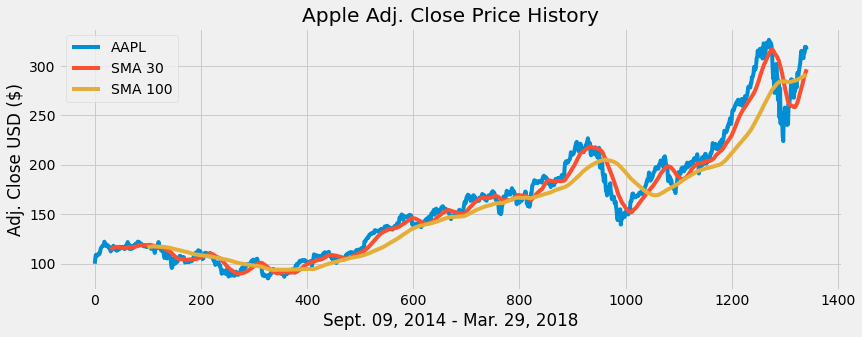

In [26]:
#Visualize
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL["Adj Close"], label = "AAPL")
plt.plot(SMA30["Adj Close"], label = "SMA 30")
plt.plot(SMA100["Adj Close"], label = "SMA 100")
plt.title("Apple Adj. Close Price History")
plt.xlabel("Sept. 09, 2014 - Mar. 29, 2018")
plt.ylabel("Adj. Close USD ($)")
plt.legend(loc="upper left")
plt.show()

In [27]:
#Strategy is buy any time the short-term average crosses the long-term average
#Every time the SMA30 Crosses the SMA100
#Orange (short term) down the yellow (long term) and it crosses
#The sell is the same but inverted

data = pd.DataFrame()
data["AAPL"] = AAPL["Adj Close"]
data["SMA30"] = SMA30["Adj Close"]
data["SMA100"] = SMA100["Adj Close"]
data


,AAPL,SMA30,SMA100
0,99.772209,NaN,NaN
1,105.412628,NaN,NaN
2,108.694481,NaN,NaN
3,107.103836,NaN,NaN
4,108.447662,NaN,NaN
...,...,...,...
1337,313.140015,289.577426,290.037927
1338,319.230011,291.594106,290.345799
1339,316.850006,293.310716,290.630966
1340,318.890015,295.031499,290.919420


In [0]:
#When buy and when to sell the asset/stock
def buy_sell(data):
  sig_price_buy = []
  sig_price_sell = []
  flag = -1

  for i in range(len(data)):
    if data["SMA30"][i] > data["SMA100"][i]:
      if flag != 1:
        sig_price_buy.append(data["AAPL"][i])
        sig_price_sell.append(np.nan)
        flag = 1
      else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)
    elif data["SMA30"][i] < data["SMA100"][i]:
      if flag != 0:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(data["AAPL"][i])
        flag = 0
      else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)
    else:
      sig_price_buy.append(np.nan)
      sig_price_sell.append(np.nan)
  return (sig_price_buy, sig_price_sell)
      

In [30]:
#Store buy and sell into a variable
buy_sell = buy_sell(data)
data["Buy_Signal_Price"] = buy_sell[0]
data["Sell_Signal_Price"] = buy_sell[1]
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,99.772209,NaN,NaN,NaN,NaN
1,105.412628,NaN,NaN,NaN,NaN
2,108.694481,NaN,NaN,NaN,NaN
3,107.103836,NaN,NaN,NaN,NaN
4,108.447662,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1337,313.140015,289.577426,290.037927,NaN,NaN
1338,319.230011,291.594106,290.345799,319.230011,NaN
1339,316.850006,293.310716,290.630966,NaN,NaN
1340,318.890015,295.031499,290.919420,NaN,NaN


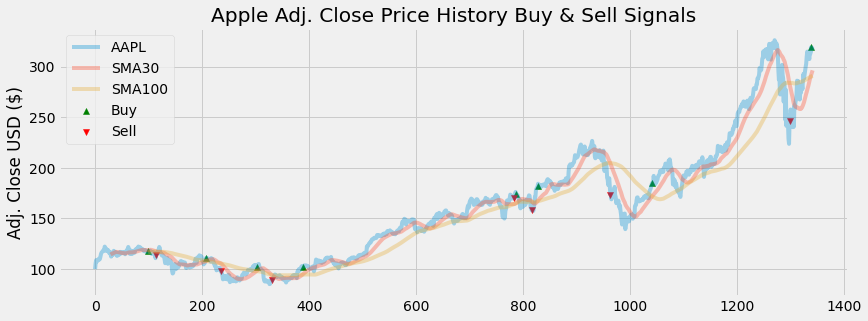

In [34]:
#visualize
plt.figure(figsize=(12.6, 4.6))
plt.plot(data["AAPL"], label = "AAPL", alpha = 0.35)
plt.plot(data["SMA30"], label = "SMA30", alpha = 0.35)
plt.plot(data["SMA100"], label = "SMA100", alpha = 0.35)
plt.scatter(data.index, data["Buy_Signal_Price"], label = "Buy", marker="^", color = "green")
plt.scatter(data.index, data["Sell_Signal_Price"], label = "Sell", marker="v", color = "red")
plt.title("Apple Adj. Close Price History Buy & Sell Signals")
plt.ylabel("Adj. Close USD ($)")
plt.legend(loc="upper left")
plt.show()